In [95]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

In [96]:
start = datetime.strptime('2004-01-02','%Y-%m-%d')
end = datetime.strptime('2009-6-30','%Y-%m-%d')

df = data.DataReader('^HSI',start=start, end=end, data_source='yahoo')
df = df[:1500]['Close']

In [97]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(df).reshape(-1,1))

In [98]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:]

In [99]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [100]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [101]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout

In [103]:
model=Sequential() 
model.add(LSTM(100,return_sequences=True,input_shape=(100,1))) 
model.add(LSTM(100,return_sequences=True))
model.add(Dense(16,activation='relu'))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [104]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 4s 296ms/step - loss: 0.0226 - val_loss: 0.0228
Epoch 2/100
13/13 [==============================] - 3s 205ms/step - loss: 0.0040 - val_loss: 0.0065
Epoch 3/100
13/13 [==============================] - 3s 205ms/step - loss: 7.9440e-04 - val_loss: 0.0128
Epoch 4/100
13/13 [==============================] - 3s 216ms/step - loss: 6.4390e-04 - val_loss: 0.0078
Epoch 5/100
13/13 [==============================] - 3s 257ms/step - loss: 5.8224e-04 - val_loss: 0.0068
Epoch 6/100
13/13 [==============================] - 3s 215ms/step - loss: 6.9814e-04 - val_loss: 0.0057
Epoch 7/100
13/13 [==============================] - 3s 260ms/step - loss: 6.5034e-04 - val_loss: 0.0094
Epoch 8/100
13/13 [==============================] - 3s 205ms/step - loss: 5.7816e-04 - val_loss: 0.0072
Epoch 9/100
13/13 [==============================] - 3s 202ms/step - loss: 5.1950e-04 - val_loss: 0.0079
Epoch 10/100
13/13 [==============================] - 4s 298ms/

13/13 [==============================] - 3s 214ms/step - loss: 2.6750e-04 - val_loss: 0.0030
Epoch 79/100
13/13 [==============================] - 3s 213ms/step - loss: 2.2975e-04 - val_loss: 0.0033
Epoch 80/100
13/13 [==============================] - 3s 215ms/step - loss: 2.9731e-04 - val_loss: 0.0051
Epoch 81/100
13/13 [==============================] - 3s 218ms/step - loss: 3.4313e-04 - val_loss: 0.0034
Epoch 82/100
13/13 [==============================] - 3s 217ms/step - loss: 2.7011e-04 - val_loss: 0.0036
Epoch 83/100
13/13 [==============================] - 3s 226ms/step - loss: 2.5925e-04 - val_loss: 0.0044
Epoch 84/100
13/13 [==============================] - 3s 220ms/step - loss: 3.0407e-04 - val_loss: 0.0042
Epoch 85/100
13/13 [==============================] - 3s 224ms/step - loss: 3.5854e-04 - val_loss: 0.0042
Epoch 86/100
13/13 [==============================] - 3s 225ms/step - loss: 3.0192e-04 - val_loss: 0.0036
Epoch 87/100
13/13 [==============================] - 3s 22

In [105]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

<function matplotlib.pyplot.show(close=None, block=None)>

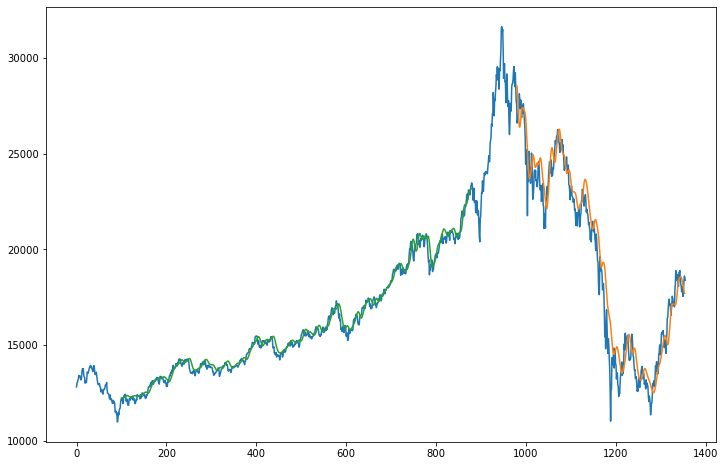

In [106]:
look_back=100
trainPredictPlot=np.empty_like(data)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot=np.empty_like(data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1,:] = test_predict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

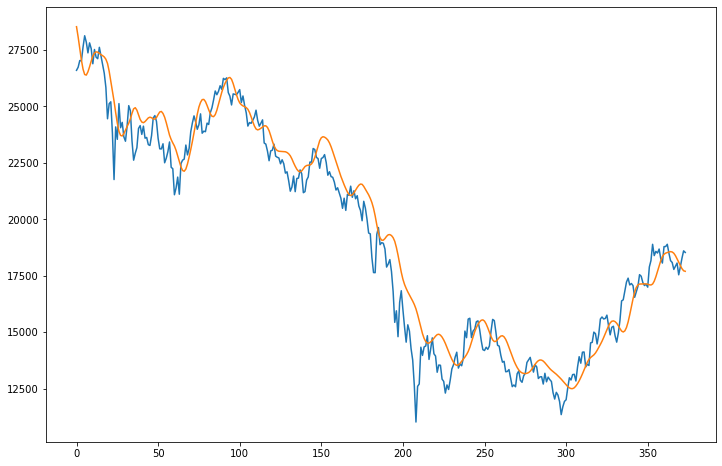

In [107]:
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data)[len(train_predict)+(look_back*2)+1:len(data)-1])
plt.plot(test_predict)
plt.show